<a href="https://colab.research.google.com/github/Manash-Christ/DAA-Trimester2/blob/main/DAA_CIA1_2348528.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Analysis of sorting algorithms

#### Create function to generate random arrays of random length

In [ ]:
# generate randomg lists of numbers
rng = np.random.default_rng()
def randgen(shuffle:bool=True,**kwargs):
  if shuffle:
    return rng.integers(low=0,high=100,size=rng.integers(10000))
  else:
    return rng.integers(low=0,high=100,size=kwargs['size'])

arr = randgen()
print("Length of random array: %d"%len(arr))
arr

Length of random array: 6637


array([ 9, 95, 57, ..., 59, 37, 10])

#### Creating dataframe to store the values

In [ ]:
# Two columns are made, one of the input size of the array and the other of the time taken
bubb  = pd.DataFrame(columns=['inputsize', 'avgtime'])
inse  = pd.DataFrame(columns=['inputsize', 'avgtime'],)
quic = pd.DataFrame(columns=['inputsize', 'avgtime'],)

### Bubble sort

In [ ]:
# Bubble sort
# Repeated comparison and interchange of adjacent cells.
# T(N) = n^2
def bubble(array):
  start = time.time()
  for p in range(len(array)):
    #print(f"iteration {p} --> array {array}")
    for q in range(len(array)-p-1):
      if array[q]>array[q+1]:
        array[q],array[q+1] = array[q+1],array[q]
        #print(f"sorting iteration {q+1}",array)
  duration = time.time() - start
  bubb.loc[len(bubb)+1] = [len(array),duration]
  return array

#### Testing loop

In [ ]:
for i in tqdm(range(100)):
  #print( f"\n-xx-------ARRAY-------xx-\n{i+1}")
  array = randgen()
  bubble(array)

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [15:31<00:00,  9.32s/it]


In [ ]:
print(f"For the average input size of {bubb.inputsize.mean()}, the average time taken for Bubble sort is {bubb.avgtime.mean()} seconds.")

For the average input size of 4896.04, the average time taken for Bubble sort is 9.312263488769531 seconds.


In [ ]:
bubb.describe().T

,count,mean,std,min,25%,50%,75%,max
inputsize,100.0,4896.040000,2997.726529,8.000000,2267.500000,4540.000000,7523.000000,9915.000000
avgtime,100.0,9.312263,8.944903,0.000042,1.400469,6.404644,14.839803,32.506163


### Quick Sort

In [ ]:
# Quick Sort
# An element is selected as a pivot, compared to all the other elements, and ultimately put into its position.
# Array is then partitioned in two halves according to that pivot and recursively applied pivot and partition.
# T(N) = O(nlog(n)) to O(n^2)
def quick_sort(array,low,high):
    def part(array,low,high):
      pivot = array[high]
      #print(f"Pivot element is {pivot} at {high} index")
      i = low - 1
      for j in range(low,high):
        if array[j]<=pivot:
          i+=1
          array[i],array[j] = array[j],array[i]
          #print(f'interswitching {array[j]} with {array[i]}')
      array[i+1], array[high] = array[high], array[i+1]
      return i+1
    def quick(array,low,high):
      if low<high:
        #print(f"Partitioning....")
        p = part(array,low,high)
        #print(f"Sorting....")
        quick(array,low,p-1)
        quick(array,p+1,high)
    start = time.time()
    quick(array,low,high)
    duration = time.time() - start
    quic.loc[len(quic)+1] = [len(array),duration]
    return array

#### Testing loop

In [ ]:
for i in tqdm(range(100)):
  #print( f"\n-xx-------ARRAY-------xx-\n{i+1}")
  array = randgen()
  quick_sort(array,0,len(array)-1)

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.63it/s]


In [ ]:
print(f"For the average input size of {quic.inputsize.mean()}, the average time taken for Bubble sort is {quic.avgtime.mean()} seconds.")

For the average input size of 4558.25, the average time taken for Bubble sort is 0.12844732522964478 seconds.


In [ ]:
quic.describe().T

,count,mean,std,min,25%,50%,75%,max
inputsize,100.0,4558.250000,3032.990888,26.00000,1649.500000,4677.500000,7071.000000,9999.000000
avgtime,100.0,0.128447,0.128412,0.00008,0.023195,0.099758,0.189934,0.729372


### Insert Sort

In [ ]:
#Insert Sort
#Iterates through the array, removing one element at a time and placing it in the right index, one element at a time.
def insert(array):
  start = time.time()
  for i in range(1,len(array)):
    #print(f'Begin at {array[i]}')
    j = i
    while array[j-1]>array[j] and j > 0:
      array[j-1],array[j] = array[j],array[j-1]
      #print(f'interswitching {array[j-1]} with {array[j]}')
      j-=1
      #print(f'increment j to {j}')
  duration = time.time() - start
  inse.loc[len(inse)+1] = [len(array),duration]
  return array



In [ ]:
for i in tqdm(range(100)):
  #print( f"\n-xx-------ARRAY-------xx-\n{i+1}")
  array = randgen()
  insert(array)

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [11:29<00:00,  6.90s/it]


In [ ]:
print(f"For the average input size of {inse.inputsize.mean()}, the average time taken for Bubble sort is {inse.avgtime.mean()} seconds.")

For the average input size of 4682.87, the average time taken for Bubble sort is 6.893662550449371 seconds.


In [ ]:
inse.describe().T

,count,mean,std,min,25%,50%,75%,max
inputsize,100.0,4682.870000,3049.800019,23.000000,2047.750000,4628.500000,7152.750000,9875.000000
avgtime,100.0,6.893663,6.923447,0.000329,0.904888,4.974418,10.716507,23.435344


### Comparision between the three algorithms

#### Scatter plot of simulation results

Text(0, 0.5, 'Time(nanoseconds)')

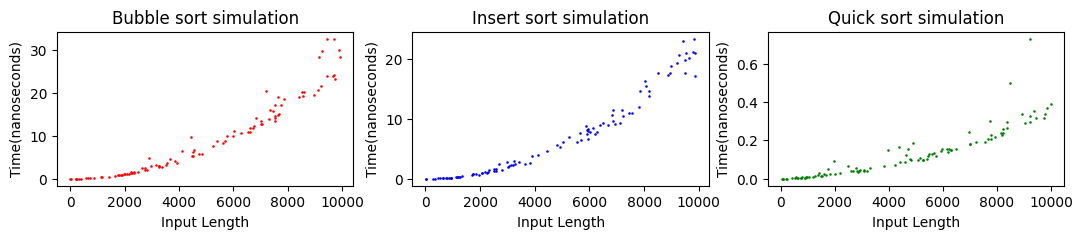

In [ ]:
f ,a = plt.subplots(1,3,figsize=(13,2),sharey=False,squeeze=True)
a[0].scatter(bubb.inputsize,bubb.avgtime,s=0.7,color='r');a[0].set_title("Bubble sort simulation");a[0].set_ylabel("Time(nanoseconds)");a[0].set_xlabel("Input Length")
a[1].scatter(inse.inputsize,inse.avgtime,s=0.7,color='b');a[1].set_title("Insert sort simulation");a[1].set_xlabel("Input Length");a[1].set_ylabel("Time(nanoseconds)")
a[2].scatter(quic.inputsize,quic.avgtime,s=0.7,color='g');a[2].set_title("Quick sort simulation");a[2].set_xlabel("Input Length");a[2].set_ylabel("Time(nanoseconds)")

#### Reg plot of average results

<Axes: xlabel='inputsize', ylabel='avgtime'>

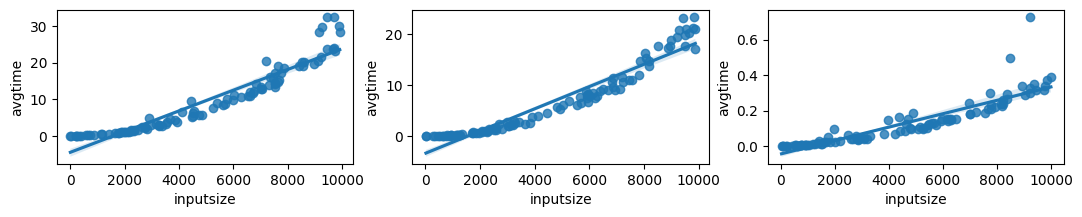

In [ ]:
f ,a = plt.subplots(1,3,figsize=(13,2),sharey=False,squeeze=True)
sns.regplot(x=bubb.inputsize,y=bubb.avgtime,ax=a[0])
sns.regplot(x=inse.inputsize,y=inse.avgtime,ax=a[1])
sns.regplot(x=quic.inputsize,y=quic.avgtime,ax=a[2])

Text(0.5, 1.0, 'Quick sort time distribution')

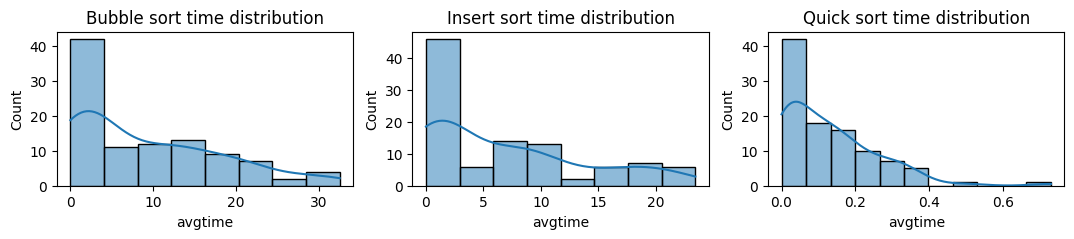

In [ ]:
f ,a = plt.subplots(1,3,figsize=(13,2),sharey=False,squeeze=True)
sns.histplot(x=bubb.avgtime,ax=a[0],kde=True);a[0].set_title("Bubble sort time distribution")
sns.histplot(x=inse.avgtime,ax=a[1],kde=True);a[1].set_title("Insert sort time distribution")
sns.histplot(x=quic.avgtime,ax=a[2],kde=True);a[2].set_title("Quick sort time distribution")


#### In conclusion, we can say that because of the divide and conquer approach of quick sort, it is the fastest (by miles) in this comparision